# Visualization of the data
## H3.6m dataset

The dataset contains 17 scenarios:

In [1]:
scenarios = ["walking", "eating", "smoking", "discussion", "directions",
                    "greeting", "phoning", "posing", "purchases", "sitting",
                    "sittingdown", "takingphoto", "waiting", "walkingdog",
                    "walkingtogether"]

The actions are performed by several subjects (human actors), each of them is identified by a number:

In [2]:
subs = [
    [1, 6, 7, 8, 9], # train
    [11], # validation
    [5] # test
]

The original dataset is captured at 50Hz (1 / 20ms). We will apply a downsampling factor of 2 -> 25Hz (1 / 40ms).
10 frames are used as seed frames, and the model is trained to predict the next 10 frames. (400ms seed, 400ms prediction)


## Joint xyz coordinate format

33 joints are tracked for each frame of the sequence. The joints are identified by a number:

In [3]:
joint_name_h3m = [
    "Hips", "RightUpLeg", "RightLeg", "RightFoot", "RightToeBase", "Site", "LeftUpLeg", "LeftLeg", "LeftFoot",
    "LeftToeBase", "Site", "Spine", "Spine1", "Neck", "Head", "Site", "LeftShoulder", "LeftArm", "LeftForeArm",
    "LeftHand", "LeftHandThumb", "Site", "L_Wrist_End", "Site", "RightShoulder", "RightArm", "RightForeArm",
    "RightHand", "RightHandThumb", "Site", "R_Wrist_End", "Site"
]

Several joints are constant or are at same position with other joints, and will be ignored:

In [4]:
import numpy as np

joint_to_ignore = np.array([0, 1, 6, 11, 16, 20, 23, 24, 28, 31])

print('joints to be ignored:', np.array(joint_name_h3m)[joint_to_ignore])
print('number of joints left:', len(joint_name_h3m) - len(joint_to_ignore))

joints to be ignored: ['Hips' 'RightUpLeg' 'LeftUpLeg' 'Spine' 'LeftShoulder' 'LeftHandThumb'
 'Site' 'RightShoulder' 'RightHandThumb' 'Site']
number of joints left: 22


The raw data is provided in the axis-angle format. The xyz coordinates are obtained by an exponential map, then the global rotation and translation are removed (local movement).

In [5]:
import sys
sys.path.append('/home/azhuavlev/PycharmProjects/MotionMixerConv')
from h36m.datasets import dataset_h36m, dataset_h36m_ang
%load_ext autoreload
%autoreload 2

dataset_xyz = dataset_h36m.H36M_Dataset(
    data_dir='/home/azhuavlev/Desktop/Data/CUDA_lab/VisionLabSS23_3DPoses',
    input_n=100,
    output_n=100,
    skip_rate=2,
    split=0
)

Example preprocessed batch, joint coordinates are im millimeters (mm):
_Important note_: h3.6m uses OpenCV coordinate system, which has different coordinate axes orientation:
Matplotlib: x right, y forward, z up
Opencv: x right, y down, z forward
To convert between them, we need to swap y and z axes, and negate y axis.
This does *not* affect the *training*, but is relevant for visualization.

In [9]:
batch = dataset_xyz[0][:, dataset_xyz.dimensions_to_use]

print(batch)
print('batch.shape', batch.shape)

[[ -71.22052  -419.46445   128.04242  ... -233.02156  -241.97878
    66.888115]
 [ -70.48413  -419.0326    129.09505  ... -236.51244  -242.83264
    67.11383 ]
 [ -69.48038  -418.509     130.29828  ... -239.31981  -242.51956
    69.43913 ]
 ...
 [-118.77522  -373.72687   237.24037  ... -275.61002  -238.96727
    23.281116]
 [-111.79299  -370.53876   241.67976  ... -271.5594   -236.72733
    39.22251 ]
 [ -98.78412  -369.84366   241.25525  ... -268.8989   -233.02702
    52.89633 ]]
batch.shape (200, 66)


KeyboardInterrupt: 

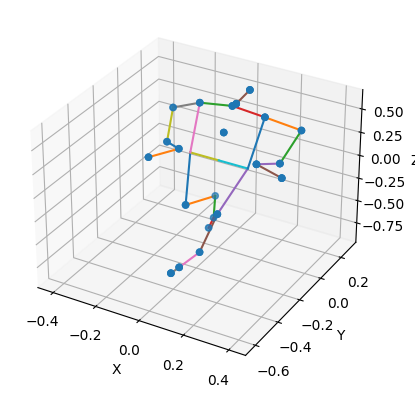

In [10]:
import conv_mixer.visualization_helpers

conv_mixer.visualization_helpers.visualize_batch(dataset_xyz[100])

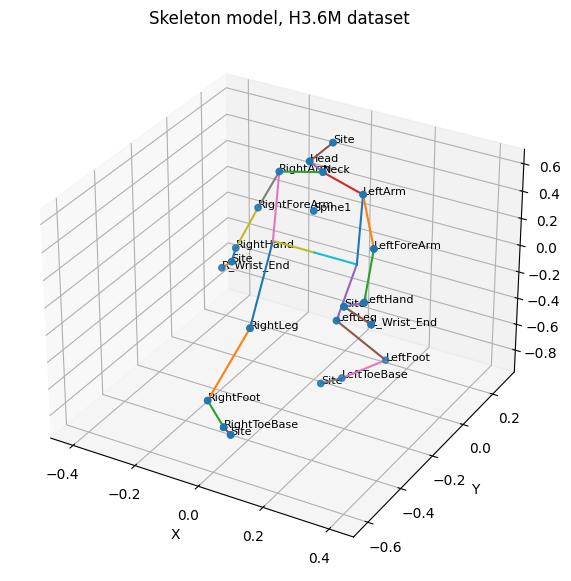

In [34]:
conv_mixer.visualization_helpers.visualize_batch_single_h3m(dataset_xyz[100])

In [11]:
from IPython.display import Video

Video("/home/azhuavlev/PycharmProjects/MotionMixerConv/conv_mixer/animation.mp4")

Animation

## Axis-angle format

The second possible format is axis-angle. Again, the global rotation and translation are removed (local movement), but we use less joints than in the xyz format. Train/validation/test splits and the number of sequences are the same.

In [12]:
dimensions_to_use_angle = np.array(
            [6, 7, 8, 9, 12, 13, 14, 15, 21, 22, 23, 24, 27, 28, 29, 30, 36, 37, 38, 39, 40, 41, 42,
             43, 44, 45, 46, 47, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86])
dimensions_to_ignore_angle = np.array(
            [0, 1, 2, 3, 4, 5, 10, 11, 16, 17, 18, 19, 20, 25, 26, 31, 32, 33, 34, 35, 48, 49, 50, 58,
              59, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 82, 83, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
              98])
print('number of joints to use:', len(dimensions_to_use_angle) // 3)
print('number of joints to ignore:', len(dimensions_to_ignore_angle) //3)

number of joints to use: 16
number of joints to ignore: 17


In [13]:
dataset_angle = dataset_h36m_ang.H36M_Dataset_Angle(
    data_dir='/home/azhuavlev/Desktop/Data/CUDA_lab/VisionLabSS23_3DPoses',
    input_n=100,
    output_n=100,
    skip_rate=2,
    split=0
)

In [14]:
batch_angle = dataset_angle[0][:, dimensions_to_use_angle]

print(batch_angle)
print('batch_angle.shape', batch_angle.shape)

[[ 0.3230213 -0.4831149 -0.0673216 ...  0.1473034 -0.1267874 -0.0072563]
 [ 0.3259532 -0.4838686 -0.0682784 ...  0.1349617 -0.0768555  0.0021032]
 [ 0.3294488 -0.4855806 -0.0695968 ...  0.1272881 -0.0470906  0.0103329]
 ...
 [ 0.5543316 -0.6687866  0.1618684 ...  0.1438099  0.2838625 -0.0268883]
 [ 0.5716785 -0.6677975  0.1498878 ...  0.1313288  0.2131509  0.0040503]
 [ 0.5799299 -0.7250111  0.1374053 ...  0.1095381  0.1248537  0.0352608]]
batch_angle.shape (200, 48)


## Dataset captured in AIS lab

The dataset captures 27 keypoints, of which only 19 are used. The data is provided in both xyz and axis-angle formats.

In [15]:
joints_ais = [
    "Nose", "Neck", "RShoulder", "RElbow", "RWrist", "LShoulder", "LElbow", "LWrist", "MidHip", "RHip", "RKnee",
    "RAnkle", "LHip", "LKnee", "LAnkle", "REye", "LEye", "REar", "LEar"
]
joints_ais_unused = [
    "Head", "Belly", "LBToe", "LSToe", "LHeel", "RBToe", "RSToe", "RHeel"
]

Input data format is JSON:

In [16]:
import json

in_file_name = "/home/azhuavlev/Desktop/Data/CUDA_lab/VisionLabSS23_3DPoses/2021-08-04-singlePerson_000.json"
with open(in_file_name, 'r') as f:
    pose_data = json.load(f)
pose_data[0]

{'person': {'id': 0,
  'keypoints': [{'score': 3.3462276458740234,
    'pos': [-1.579332303842465, 5.254447240387596, 1.2453899554859404],
    'cov': [0.00028858751417853756,
     -0.00014108748570844474,
     9.386520816399225e-06,
     0.0012445461087687588,
     -0.0002077309460947308,
     0.00025123770636866134]},
   {'score': 3.274890422821045,
    'pos': [-1.7620567804996792, 5.196654735460632, 1.151986997896067],
    'cov': [0.00032619814049870385,
     -7.571728627751091e-05,
     -4.00886181359144e-05,
     0.0012121363450275273,
     -0.00016404690033416244,
     0.0002938258459040899]},
   {'score': 3.375589370727539,
    'pos': [-1.7444305881173088, 5.027870621563488, 1.1721438539347928],
    'cov': [0.00036299911969710067,
     2.28605071073364e-05,
     -1.257242842117757e-05,
     0.0010447354654037578,
     -0.00017273569573031017,
     0.0002983953391122013]},
   {'score': 2.9807207584381104,
    'pos': [-1.719707743077619, 4.746816760720528, 1.072827687136427],
    '

Some joints have score of 0, they need to be ignored

In [17]:
pose_data[0]['person']['keypoints'][-1]

{'score': 0.0, 'pos': [0.0, 0.0, 0.0], 'cov': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

In [18]:
import conv_mixer.visualize_ais_data

conv_mixer.visualize_ais_data.visualize_ais_data(
    in_file_name,
    frame_start=0,
    frame_end=1000,
    frame_step=5
)

/home/azhuavlev/PycharmProjects/MotionMixerConv/conv_mixer/visualize_ais_data.py:58: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:27<00:00,  7.31it/s]


In [19]:
Video("/home/azhuavlev/PycharmProjects/MotionMixerConv/conv_mixer/animation_ais.mp4")

In [49]:
import conv_mixer.datasets.dataset_ais_xyz as dataset_ais_xyz
dataset_ais = dataset_ais_xyz.DatasetAISxyz(
    data_dir="/home/azhuavlev/Desktop/Data/CUDA_lab/VisionLabSS23_3DPoses",
    input_n=10,
    output_n=10,
    skip_rate=2,
    actions=[
        "2021-08-04-singlePerson_003",
    ]
)

*********************************
Reading action 2021-08-04-singlePerson_003
Total n of frames 1067
Failed to process 0 frames
indices of failed frames: 
Current n of sequences: 1047


In [56]:
import torch
dataset_ais[100].shape

torch.Size([20, 57])

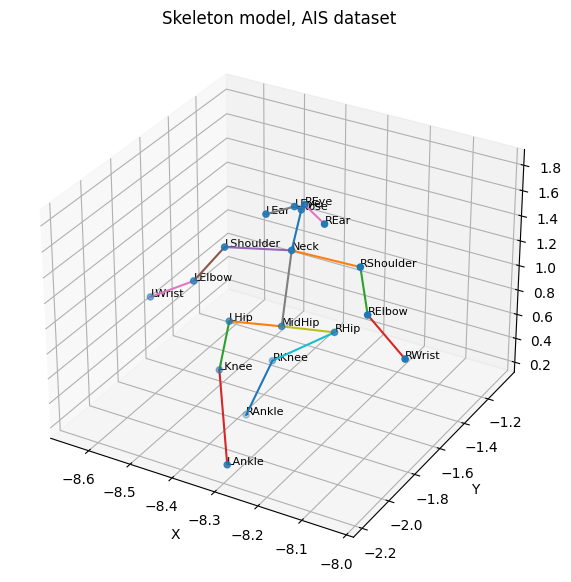

In [90]:
conv_mixer.visualization_helpers.visualize_batch_single_ais(dataset_ais[710])